In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, diff, solve, nsolve, solveset, latex, S, simplify, fraction, Union, Interval, intersection, limit
from sympy.calculus.util import continuous_domain
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
%matplotlib inline

## Занятие 8
## Математический анализ
## Дифференцирование функции, заданной параметрически
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
тогда производная $y$ по $x$  находится по формуле
$$
y'_x = \frac{y'_t}{x'_t} = \frac{\psi'_t}{\varphi'_t}
$$
Вторая производная:
$$
y''_{xx} = \frac{x'_t y''_{tt}-x''_{tt}y'_t}{(x'_t)^3}  = \frac{\varphi'_t \psi''_{tt}-\varphi''_{tt}\psi'_t}{(\varphi'_t)^3}
$$
### Задание 1
Найти производные 1 и 2 порядка функции 
$$
\left\{
\begin{matrix}
x = \sin(t) - t\cos(t)\\
y = \cos(t) + t\sin(t)
\end{matrix}
\right.
$$

In [ ]:
t = Symbol('t')
x = Sin(t) - t * Cos(t)
y = Cos(t) + t * Sin(t)
dx = diff(x, t)
dy = diff(y, t)
dy_x = dy/dx
dy2_xx = (dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3
display(dy_x, simplify(dy2_xx))

cos(t)/sin(t)

-1/(t*sin(t)**3)

### Задание 2.
Найти нули производных первого и второго порядка, а также точки, в которых эти производные не существуют, для функции
$$
\left\{
\begin{matrix}
x = t^2 - 2t\\
y = t^2 + 2t
\end{matrix}
\right.
$$

In [ ]:
x = t ** 2 - 2 * t
y = t ** 2 + 2 * t
dx = diff(x, t)
dy = diff(y, t)
dy_x = dy / dx
dy2_xx = (dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3
dy2_xx = simplify(dy2_xx)
dy_x_num, dy_x_den = fraction(dy_x)
dy_x_num_nul = solveset(dy_x_num)
dy_x_den_nul = solveset(dy_x_den)
display('Первая производная, нули числителя:', dy_x_num_nul, 'нули знаменателя:', dy_x_den_nul)
dy2_xx_num,dy2_xx_den = fraction(dy2_xx)
dy2_xx_num_nul = solveset(dy2_xx_num)
dy2_xx_den_nul = solveset(dy2_xx_den)
display('Вторая производная, нули числителя:', dy2_xx_num_nul, 'нули знаменателя:', dy2_xx_den_nul)

'Первая производная, нули числителя:'

FiniteSet(-1)

'нули знаменателя:'

FiniteSet(1)

'Вторая производная, нули числителя:'

EmptySet

'нули знаменателя:'

FiniteSet(1)

### Задание 3. 
Найти точки экстремума и точки перегиба функции Задания 2.

In [ ]:
crit_points = Union(dy_x_num_nul, dy_x_den_nul)
print('Точки экстремума:')
crit_points

Точки экстремума:


FiniteSet(-1, 1)

In [ ]:
inflection_points = Union(dy2_xx_num_nul, dy2_xx_den_nul)
print('Точки перегиба:')
inflection_points

Точки перегиба:


FiniteSet(1)

### Задание 4. Точки перегиба
Найти точки перегиба функции, график строить не нужно. 
$$
\left\{
\begin{matrix}
x = e^t\\
y = te^{2t}
\end{matrix}
\right.
$$

In [ ]:
from sympy import E

t = Symbol('t')
x = E ** t
y = t * E ** (2 * t)
dx = diff(x, t)
dy = diff(y, t)
dy_x = dy/dx
dy2_xx = (dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3
dy2_xx_num, dy2_xx_den = fraction(dy2_xx)
dy2_xx_num_nul = solveset(simplify(dy2_xx_num))
dy2_xx_den_nul = solveset(simplify(dy2_xx_den))
dy2_xx_num_nul
dy2_xx_points = list((dy2_xx_num_nul.union(dy2_xx_den_nul)))
dy2_xx_points.sort()
display(dy2_xx_points)
t0 = dy2_xx_points[0]
print('x:')
display(x.subs({t: t0}))
print('y:')
display(y.subs({t: t0}))

[-3/2]

x:


exp(-3/2)

y:


-3*exp(-3)/2

## Асимптоты параметрически заданной функции
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
Сначала нужно определить, нет ли таких значений параметра $t$, при которых одна из функций $\varphi(t)$ или $\psi(t)$ обращается в бесконечность, а другая остается конечной. При $\varphi(t_0) = \infty$, а $\psi(t_0) = c$ кривая имеет горизонтальную асимптоту  $y = c$. При  $\psi(t_0) = \infty$, а $\varphi(t_0) = c$ кривая имеет вертикальную асимптоту $x = c$. 

Если $\varphi(t_0) = \psi(t_0) = \infty$ и 
$$
\lim_{t\to t_0} \frac{\psi(t)}{\varphi(t)} = k;\qquad \lim_{t\to t_0} [\psi(t) - k\varphi(t)] = b,
$$
то   кривая имеет наклонную асимптоту  $y = kx + b$. 

### Индивидуальное задание.
Найти асимптоты параметрически заданной функции и изобразить на графике функцию и ее асимптоты.

$x = \sqrt{t + 5}$

$y = 6 + 2 / t$

In [ ]:
t = Symbol('t')
x = (t + 5) ** 0.5
y = 6 + 2 / t
limit_x = limit(x, t, 0)
display('t -> 0', limit(x, t, 0), limit(y, t, 0))
display('t -> +oo', limit(x, t, +sympy.oo), limit(y, t, +sympy.oo))

't -> 0'

2.23606797749979

oo

't -> +oo'

oo

6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


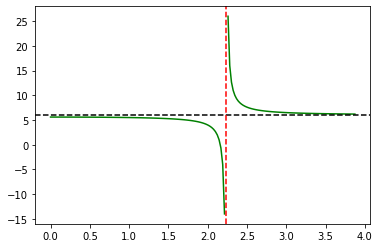

In [ ]:
T1 = np.linspace(-10, -0.1, 100)
T2 = np.linspace(0.1, 10, 100)
for T in [T1, T2]:
  plt.plot((T + 5) ** 0.5, 6 + 2 / T, color='green')
plt.axhline(y=6, color='black', linestyle='--')
plt.axvline(x=limit_x, color='red', linestyle='--')